<a href="https://colab.research.google.com/github/npnavas/MAT_421/blob/main/MAT_421_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21.4 Simpson’s Rule

Here let's consider Simpson's rule of numerical integration. Here we can think of two consecutive sub-intervals and fit a parabola $P_i(x)$ through both sub-intervals. With this set up we must have an even number of sub intervals which means an odd number of grid-points.

We can write the numerical method for every sub interval as 
$$\int_{x_{i-1}}^{x_{i+1}}P_i(x)dx = \frac{h}{3}\left(f(x_{i-1})+4f(x_i)+f(x_{i+1})\right)$$
and integrating over the whole interval leads to 
$$\int_a^b f(x) dx \approx \frac{h}{3}\left[f(x_0) + f(x_n) + 4\left(\sum_{i=1,i\notin 2\mathbb{Z}}^{n-1}f(x_i)\right) + 2\left(\sum_{i=2,i\in2\mathbb{Z}}^{n-2}f(x_i)\right)\right].$$
When doing Taylor series expansions we can see that each sub interval will have accuracy on $\mathcal{O}(h^5)$ which means over the whole interval we'd have an accuracy of $\mathcal{O}(h^4)$. Let's use this method in python on the integral 
$$\int _0^1\frac{x^4\left(1-x\right)^4}{1+x^2}dx$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
  return ((x**4) * (1-x)**4)/(1+x**2)

x0 = 0
x1 = 1
n = 25
h = (x1-x0)/(n-1)
x = np.linspace(x0, x1, n)
f = f(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
print(f"Integral using Simpson's method: {I_simp}")
print(f"Error from exact: {np.abs(I_simp - ((22/7) - np.pi))}")

Integral using Simpson's method: 0.0012644869831941548
Error from exact: 2.284155522927836e-09


# 21.5 Computing Integrals in Python
Here we can use the package `scipy` which has sub package `integrate` to find numerical integrals. Let's try it with our function
$$f(x) = \frac{x^4(1-x)^4}{1+x^2}.$$ 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

plt.style.use('default')

def f(x):
  return ((x**4) * (1-x)**4)/(1+x**2)

x0 = 0
x1 = 1
n = 25
h = (x1-x0)/(n-1)
x = np.linspace(x0, x1, n)
f = f(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

0.001264489381557153
0.001264489381557153


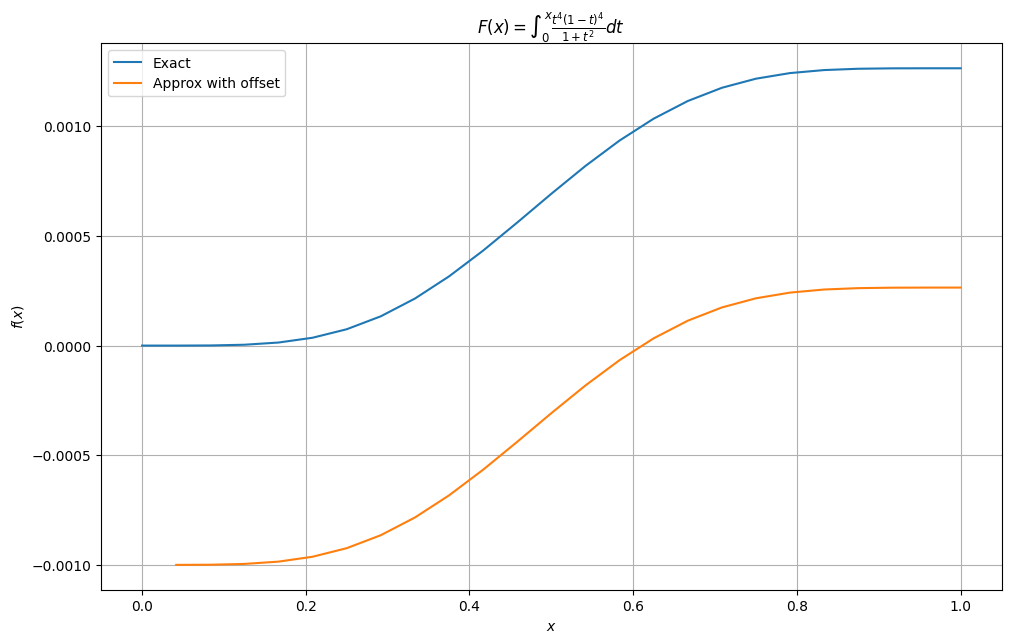

In [11]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt


def f(x):
  return ((x**4) * (1-x)**4)/(1+x**2)

F_exact = 4*x - (4/3)*x**3 + x**5 - (2/3)*x**6 + (1/7)*x**7 - 4*np.arctan(x)
F_approx = cumtrapz(f(x), x) -0.001

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title(r'$F(x) = \int_0^{x} \frac{t^4(1-t)^4}{1+t^2} dt$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend(['Exact', 'Approx with offset'])
plt.show()

In [13]:
from scipy.integrate import quad 

def f(x):
  return ((x**4) * (1-x)**4)/(1+x**2)

I_quad, est_err_quad = \
          quad(f, 0, 1)
print(I_quad)
err_quad = ((22/7)-np.pi) - I_quad
print(est_err_quad, err_quad)

0.0012644892673496185
1.1126990906558069e-14 5.919743861770854e-17
